In [1]:
import graphs
import policys
from tqdm.auto import tqdm
import numpy as np

import random

random.seed(12)

# graph plot: by sparse

In [55]:
ngraph = 10
nnodes = 50
sparse = [1,5,10,25]
sampler = 'tree'

In [56]:
Meek_sep = []
Meek_sep_1 = []
Random = []
Clique_tree = []
Oracle = []
Coloring = []

for s in tqdm(sparse):
    meek_sep = []
    meek_sep_1 = []
    random = []
    clique_tree = []
    oracle = []
    coloring = []
    
    for _ in range(ngraph):
        p = graphs.mean_match(nnodes=nnodes, sampler=sampler, sparse=s)

        p.reset()
        I = policys.meek_sep_policy(p, onebyone=False)
        meek_sep.append(len(I))

        p.reset()
        I = policys.meek_sep_policy(p, onebyone=True)
        meek_sep_1.append(len(I))
        
        p.reset()
        I = policys.random_policy(p, 1)
        random.append(len(I))

        p.reset()
        I = policys.clique_tree_policy(p, 1)
        clique_tree.append(len(I))

        p.reset()
        I = policys.oracle_policy(p, 1)
        oracle.append(len(I))

        p.reset()
        I = policys.structure_policy(p, 1)
        coloring.append(len(I))
    
    Meek_sep.append(meek_sep)
    Meek_sep_1.append(meek_sep_1)
    Random.append(random)
    Clique_tree.append(clique_tree)
    Oracle.append(oracle)
    Coloring.append(coloring)

  0%|          | 0/4 [00:00<?, ?it/s]

/home/jzhang/miniconda3/envs/dag/lib/python3.11/site-packages/graphical_models/custom_types.py:13: UserWarning: [Need name!] still needs to be tested. If you intend to use this method, please submit a pull request.
  warn(s)


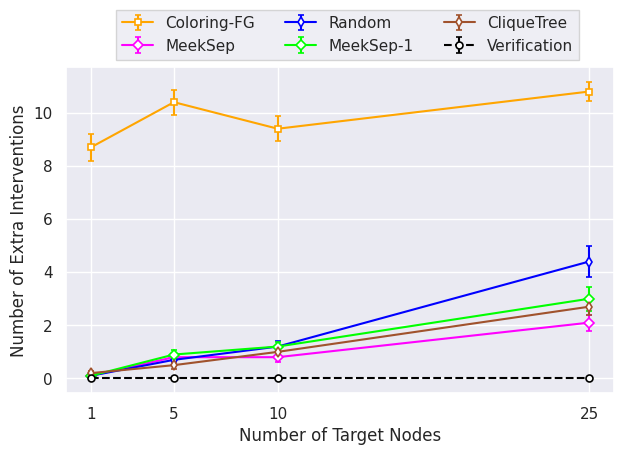

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

std = 0.2

plt.errorbar(sparse, np.mean(Coloring, axis=1)-np.mean(Oracle, axis=1), std*np.std(Coloring, axis=1), label='Coloring-FG',
            marker='s', mfc='white', ms=5, mew=1.2, capsize=2, color='orange')
plt.errorbar(sparse, np.mean(Meek_sep, axis=1)-np.mean(Oracle, axis=1), std*np.std(Meek_sep, axis=1), label='MeekSep',
            marker='D', mfc='white', ms=5, mew=1.2, capsize=2, color='magenta')
plt.errorbar(sparse, np.mean(Random, axis=1)-np.mean(Oracle, axis=1), std*np.std(Random, axis=1), label='Random',
            marker='d', mfc='white', ms=5, mew=1.2, capsize=2, color='blue')
plt.errorbar(sparse, np.mean(Meek_sep_1, axis=1)-np.mean(Oracle, axis=1), std*np.std(Meek_sep_1, axis=1), label='MeekSep-1',
            marker='D', mfc='white', ms=5, mew=1.2, capsize=2, color='lime')
plt.errorbar(sparse, np.mean(Clique_tree, axis=1)-np.mean(Oracle, axis=1), std*np.std(Clique_tree, axis=1), label='CliqueTree',
            marker='d', mfc='white', ms=5, mew=1.2, capsize=2, color='sienna')
plt.errorbar(sparse, np.mean(Oracle, axis=1)-np.mean(Oracle, axis=1), std*np.std(Oracle, axis=1), label='Verification', linestyle='--',
             marker='o', mfc='white', ms=5, mew=1.2, capsize=2, color='black')


plt.xticks(sparse)

plt.xlabel('Number of Target Nodes')
plt.ylabel('Number of Extra Interventions')

plt.legend(bbox_to_anchor=(.95, 1.2),
          fancybox=False, shadow=False, ncol=3)
plt.tight_layout()

plt.savefig(f'./results/nnodes_{nnodes}-{sampler}.pdf')

# sparse plot: by nnodes

In [87]:
ngraph = 10
nnodes = [50, 75, 100, 125]
sparse = 25
sampler = 'random'

In [ ]:
Meek_sep = []
Meek_sep_1 = []
Random = []
Clique_tree = []
Oracle = []
Coloring = []

for n in tqdm(nnodes):
    meek_sep = []
    meek_sep_1 = []
    random = []
    clique_tree = []
    oracle = []
    coloring = []
    
    for _ in range(ngraph):
        p = graphs.mean_match(nnodes=n, sampler=sampler, sparse=sparse)

        p.reset()
        I = policys.meek_sep_policy(p, onebyone=False)
        meek_sep.append(len(I))

        p.reset()
        I = policys.meek_sep_policy(p, onebyone=True)
        meek_sep_1.append(len(I))
        
        p.reset()
        I = policys.random_policy(p, 1)
        random.append(len(I))

        p.reset()
        I = policys.clique_tree_policy(p, 1)
        clique_tree.append(len(I))

        p.reset()
        I = policys.oracle_policy(p, 1)
        oracle.append(len(I))

        p.reset()
        I = policys.structure_policy(p, 1)
        coloring.append(len(I))
    
    Meek_sep.append(meek_sep)
    Meek_sep_1.append(meek_sep_1)
    Random.append(random)
    Clique_tree.append(clique_tree)
    Oracle.append(oracle)
    Coloring.append(coloring)

  0%|          | 0/4 [00:00<?, ?it/s]

/home/jzhang/miniconda3/envs/dag/lib/python3.11/site-packages/graphical_models/custom_types.py:13: UserWarning: [Need name!] still needs to be tested. If you intend to use this method, please submit a pull request.
  warn(s)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

std = 0.2
relative = 0

plt.errorbar(nnodes, np.mean(Coloring, axis=1)-relative*np.mean(Oracle, axis=1), std*np.std(Coloring, axis=1), label='Coloring-FG',
            marker='s', mfc='white', ms=5, mew=1.2, capsize=2, color='orange')
plt.errorbar(nnodes, np.mean(Meek_sep, axis=1)-relative*np.mean(Oracle, axis=1), std*np.std(Meek_sep, axis=1), label='MeekSep',
            marker='D', mfc='white', ms=5, mew=1.2, capsize=2, color='magenta')
plt.errorbar(nnodes, np.mean(Random, axis=1)-relative*np.mean(Oracle, axis=1), std*np.std(Random, axis=1), label='Random',
            marker='d', mfc='white', ms=5, mew=1.2, capsize=2, color='blue')
plt.errorbar(nnodes, np.mean(Meek_sep_1, axis=1)-relative*np.mean(Oracle, axis=1), std*np.std(Meek_sep_1, axis=1), label='MeekSep-1',
            marker='D', mfc='white', ms=5, mew=1.2, capsize=2, color='lime')
plt.errorbar(nnodes, np.mean(Clique_tree, axis=1)-relative*np.mean(Oracle, axis=1), std*np.std(Clique_tree, axis=1), label='CliqueTree',
            marker='d', mfc='white', ms=5, mew=1.2, capsize=2, color='sienna')
plt.errorbar(nnodes, np.mean(Oracle, axis=1)-relative*np.mean(Oracle, axis=1), std*np.std(Oracle, axis=1), label='Verification', linestyle='--',
             marker='o', mfc='white', ms=5, mew=1.2, capsize=2, color='black')


plt.xticks(nnodes)

plt.xlabel('Number of Nodes')
plt.ylabel('Number of Interventions')

plt.legend(bbox_to_anchor=(.95, 1.2),
          fancybox=False, shadow=False, ncol=3)
plt.tight_layout()

plt.savefig(f'./results/sparse_{sparse}-{sampler}.pdf')